In [24]:
import numpy as np
import pandas as pd
import cv2
import os, os.path
import matplotlib.pyplot as plt
import seaborn as sns
#from keras.datasets import cifar10
#from google.colab.patches import cv2_imshow
%matplotlib inline

***
***
**Deneme Hücreleri:**

In [25]:
os.listdir("train/")[0:5]

['1.png', '10.png', '100.png', '1000.png', '10000.png']

In [26]:
os.path.splitext(os.listdir("train")[1])

('10', '.png')

***
---

In [27]:
df_labels = pd.read_csv("trainLabels.csv", index_col="id")
df_labels.head()

,label
id,
1,frog
2,truck
3,truck
4,deer
5,automobile


In [40]:
%%time
np.random.seed(42)
indices = np.random.choice(50000,2500)

image_array = np.empty(shape=(2500,2500), dtype="uint8")
label_array = np.empty(shape=(2500,1), dtype="object")
name_array = np.empty(shape=(2500,1), dtype="object")
for num, indx in enumerate(indices):
    path = f"train/{indx}.png"
    img_array = cv2.imread(path, 0)
    img_array = cv2.resize(img_array, (50,50))
    image_array[num] = img_array.reshape(-1)
    label_array[num] = df_labels.loc[indx, "label"]
    name_array[num] = str(indx) + ".png"

# put the arrays to a DataFrame to work on them easier
train_df = pd.DataFrame(np.concatenate([image_array, label_array, name_array], axis=1))
# change the last columns names
train_df = train_df.rename(columns={2501:"Img Name", 2500:"Label"})
# change the data type from 'object' to 'uint8' for the rest
train_df.iloc[:, :-2] = train_df.iloc[:, :-2].astype("uint8")

Wall time: 1.61 s


In [41]:
train_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,2492,2493,2494,2495,2496,2497,2498,2499,Label,Img Name
0,75,85,102,140,164,179,152,134,127,121,...,51,43,35,34,29,20,27,35,cat,15795.png
1,172,170,167,166,166,167,167,167,166,167,...,6,10,19,19,20,24,48,67,ship,860.png
2,74,75,77,74,68,61,79,92,98,95,...,81,82,82,81,81,82,82,82,automobile,38158.png


In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Columns: 2502 entries, 0 to Img Name
dtypes: object(2502)
memory usage: 23.9+ MB


In [7]:
%%time
np.random.seed(42)
indices = np.random.choice(50000,2500)

train_df = pd.DataFrame(columns=range(2500))

for num, indx in enumerate(indices):
    path = f"train/{indx}.png"
    image = cv2.imread(path, 0)
    image = cv2.resize(image, (50,50))
    image = image.reshape(-1)
    train_df.loc[num, :] = image

for num, indx in enumerate(indices):
    train_df.loc[num, "Img Name"] = str(indx) + ".png"
    train_df.loc[num, "Label"] = df_labels.loc[indx, "label"]

KeyboardInterrupt: 

In [8]:
train_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,75,85,102,140,164,179,152,134,127,121,...,63,59,51,43,35,34,29,20,27,35
1,172,170,167,166,166,167,167,167,166,167,...,22,8,6,10,19,19,20,24,48,67
2,74,75,77,74,68,61,79,92,98,95,...,76,79,81,82,82,81,81,82,82,82


In [9]:
# to save the file as csv:
# train_df.to_csv("cifar_10.csv", index=False)

IndexError: single positional indexer is out-of-bounds

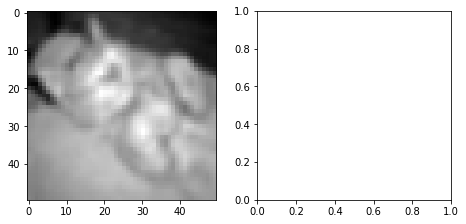

In [10]:
# some of the random choice images
plt.figure(figsize=(16,16))
subplot_num = 1
for i in np.random.randint(0,2500,16):
    plt.subplot(4,4,subplot_num)
    example = np.resize(train_df.iloc[i, :], (50,50)).astype("uint8")
    plt.imshow(example, cmap="gray")
    subplot_num+=1
plt.show()
del subplot_num

In [ ]:
#cv2.imshow('Original image',image1)
#cv2.imshow('Gray image', image2)
#cv2.waitKey(0)
#cv2.destroyAllWindows()